In [1]:
%matplotlib inline

In [25]:
import tensorflow as tf
from tensorflow import keras

In [3]:
#1. Load dataset using Keras API
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
#2. split train-test
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [5]:
#3. Describe the data
print('Features: ', X_train_full.shape)
print('Target: ', y_train_full.shape)

Features:  (60000, 28, 28)
Target:  (60000,)


In [6]:
# class_names
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

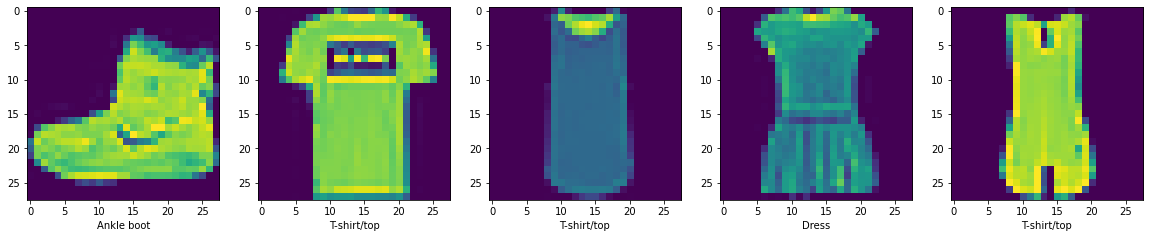

In [7]:
#4. Visualize the data set
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.tight_layout()
for i in range(5):
    image = X_train_full[i]
    plt.subplot(5/5 + 1, 5, i + 1)
    plt.imshow(image)
    plt.xlabel(class_name[y_train_full[i]])
    print()

In [8]:
#5. Scale the input features, since we are going to train the network using Gradient Descent
# we are going to scale down the pixel intensities in range of 0-1 by dividing them with 255.0
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
# Build the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
# access layer parameters
weights, biases = model.layers[1].get_weights()
print("Weights:" , weights)
print("Biases: ", biases)

Weights: [[ 0.02593276  0.04907113 -0.06174712 ... -0.05354553 -0.02523243
   0.06835078]
 [-0.07280807  0.04812395 -0.02440521 ...  0.0219888  -0.07140478
   0.02737214]
 [ 0.02744571 -0.00631487 -0.02790948 ...  0.02876607  0.05721794
   0.01517422]
 ...
 [-0.04956143 -0.03644026  0.05965321 ... -0.03809233 -0.01312654
  -0.01916916]
 [-0.0316102   0.07333139  0.0313981  ... -0.06057016 -0.04400501
  -0.01957477]
 [ 0.06144305  0.04073617  0.04365658 ... -0.05753486 -0.02438446
   0.05846895]]
Biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [13]:
# Compiling the model
# keras.losses.sparse_categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [14]:
# Fit/Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 26s 472us/sample - loss: 0.7236 - accuracy: 0.7659 - val_loss: 0.5111 - val_accuracy: 0.8312
Epoch 2/20
55000/55000 [==============================] - 23s 419us/sample - loss: 0.4921 - accuracy: 0.8287 - val_loss: 0.4523 - val_accuracy: 0.8470
Epoch 3/20
55000/55000 [==============================] - 23s 414us/sample - loss: 0.4453 - accuracy: 0.8442 - val_loss: 0.4269 - val_accuracy: 0.8522
Epoch 4/20
55000/55000 [==============================] - 23s 419us/sample - loss: 0.4190 - accuracy: 0.8532 - val_loss: 0.4011 - val_accuracy: 0.8624
Epoch 5/20
55000/55000 [==============================] - 23s 422us/sample - loss: 0.3991 - accuracy: 0.8588 - val_loss: 0.3944 - val_accuracy: 0.8592
Epoch 6/20
55000/55000 [==============================] - 22s 398us/sample - loss: 0.3829 - accuracy: 0.8653 - val_loss: 0.3680 - val_accuracy: 0.8752
Epoch 7/20
55000/55000 [=====================

In [15]:
# Save the model
model.save_weights('apparel_classification_model_wieghts.h5')
model.save('apparel_classification_model.h5')

In [18]:
#from sklearn.externals import joblib

# Save to file in the current working directory
#joblib_file = "joblib_model.pkl"
#joblib.dump(model, joblib_file)
import pickle
filename = 'finalized_model.sav'
pickle.dump(history.history, open(filename, 'wb'))

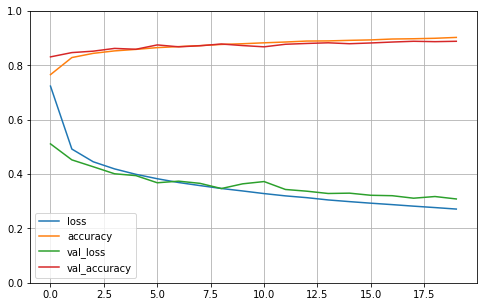

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Set vertical range
plt.show()

In [21]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[61.16568256607056, 0.8422]

In [22]:
# Make Predictions using test set
X_predict = X_test[:5]
print(X_predict[0])
y_prediction = model.predict(X_predict)
y_prediction.round(2)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [23]:
# Predict classes
import numpy as np
y_predict_class = model.predict_classes(X_predict)
# wrap around class_name
np.array(class_name)[y_predict_class]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

array(['Bag'], dtype='<U11')

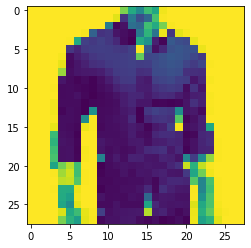

In [43]:
# Predict new images
import os
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, load_img
import cv2
from PIL import Image

dataset_dir = os.path.join(os.getcwd(), 'test-dataset')
files = [file for file in os.listdir(dataset_dir)]
X = []
for file in files:
    img = os.path.join(dataset_dir, file)
    #X.append(cv2.resize(cv2.imread(img), (28, 28), interpolation=cv2.INTER_CUBIC))
    X.append(cv2.resize(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2GRAY), (28,28)))
X = X[0]/255.0
plt.imshow(X)
y_predict_class = model.predict_classes(X.reshape(1, 28,28))
# wrap around class_name
np.array(class_name)[y_predict_class]